# Numpy/Pandas Refresher

Numpy and Pandas are not only two of the most popular Python libraries for data scientists, but they're the basic standard across the field. Knowledge of Numpy and Pandas is required for many data scientist/analyst/engineer positions in the workforce.

In this project, we plan on using both libraries to help us in data cleaning, manipulation, analysis, and storage.

To get started, import the ```numpy``` and ```pandas``` libraries below.

You may need to install these libraries if you don't have them already. To check if you need to install, run the imports first. If you get an error with a message similar to "no module 'pandas' found", run the pip commands below.

In [ ]:
# You do not need to run this cell if you already have NumPy/Pandas installed.
!pip install numpy
!pip install pandas

In [5]:
import numpy as np
import pandas as pd

# Part 1: Numpy

## Part 1.1: Numpy Arrays

In [9]:
oneDimArray = np.array([1, 2, 3, 4])
print(oneDimArray)
print(type(oneDimArray))

[1 2 3 4]
<class 'numpy.ndarray'>


In [11]:
print(oneDimArray[3])
print(oneDimArray.shape)

4
(4,)


indexing for 1d arrays yadah yadah

In [14]:
twoDimArray = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(twoDimArray)
print(type(twoDimArray))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>


In [16]:
print(twoDimArray[0])
print(twoDimArray[0][2])
print(twoDimArray.shape)

[1 2 3]
3
(3, 3)


The following code below relates to 3D arrays. Technically speaking, you can as as many dimensions to your arrays as possible (4D, 5D, etc.), but you will rarely encounter anything greater than a two dimensional array in numpy, for two reasons:


1.   Most data sets (such as Excel) use a two dimensional structure to format and store data
2.   For most kinds of data, you're unlikely to need more than two dimensions to do your work. Even for an Excel worksheet with multiple sheets, you are more likely to get individual sheets and divide them all into 2D arrays.

Still, just for fun, we'll cover what a 3D array would look like.

In [20]:
threeDimArray = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]]])
print(threeDimArray)
print(type(threeDimArray))

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]]
<class 'numpy.ndarray'>


In [22]:
print(threeDimArray[0])           # 2D array
print(threeDimArray[0][2])        # 1D array
print(threeDimArray[0][2][1])     # Individual item
print(threeDimArray.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[7 8 9]
8
(2, 3, 3)


In [24]:
print(oneDimArray.ndim)
print(twoDimArray.ndim)

1
2


## Part 1.2: Arange/Linspace

```.arange(start, stop, increment)``` works very similar to the ```range(start, stop, increment)``` function in Python.

In [28]:
for i in np.arange(3, 12, 3):
  print(i)

3
6
9


```.linspace(start, stop, x)``` returns ```x``` evenly-spaced numbers in between ```start``` and ```stop``` (inclusive).

In [31]:
for i in np.linspace(0, 1, 9):
  print(i)

0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
1.0


## Part 1.3: Distributions

We can also demonstrate distributions using NumPy. There are a LOT of distributions that can be used in NumPy, from Poisson to Chi Squared, but for today, we'll just take a look at the classic binomial distribution.

Binomial distributions can be achieved in NumPy using ```np.random.binomial(n, p)```, where ```n``` is the number of trials performed, and ```p``` is the probability of a trial occuring.

For example, if I had a quarter and wanted to see how many times I flip heads under ten flips, I can represent that as below:

In [71]:
np.random.seed(42)
np.random.binomial(10, 0.5)

4

Note that if you run the above line of code several times, you're (almost) guaranteed to get different results. What if we wanted to plot all our differing results or store all of our results? We *could* run a for loop to do this, but doing this is like drinking an entire glass of water using chopsticks: it's not very efficient.

Luckily, we can include a third parameter in our function that will quickly give us an array based on how many times we want to run the command.

In [76]:
coin_stats = np.random.binomial(10, 0.5, 1000000)
print(coin_stats)

coin_stats2 = np.array([])
for i in range(1000000):
  coin_stats2 = np.append(coin_stats2, np.random.binomial(10, 0.5))

print(coin_stats2)

[5 3 5 ... 5 6 3]


KeyboardInterrupt: 

# Part 2: Pandas

Pandas is a Python libary primarily used for data manipulation and analysis. Its name derives from "**pan**el **da**ta", a statistical term used to measure multi-dimensional dataframes over long periods of time.

Pandas is a really great tool for cleaning a dataset, calculating the statistics of a dataset, finding the correlation between values, and plotting values of the data frame.

## Part 2.1: Series and DataFrames

A **Series** in Pandas is a one dimensional array that holds information about a particular subject. It's important to note that in Pandas, the one dimensional array contains data regarding the a single *column*, and NOT information on a single row.

A **DataFrame** in Pandas is a two dimensional array that acts primarily like a table with rows and columns. You can imagine DataFrames as a "collection" of Series.

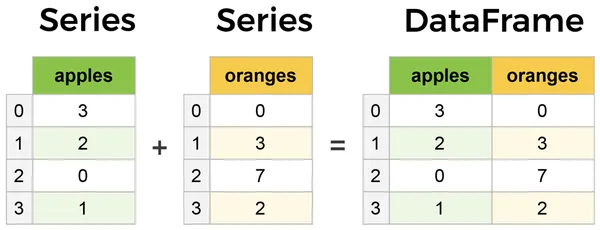

In [78]:
import IPython.display

diagram = IPython.display.Image('nppd/series-and-dataframe.png')
diagram

## Part 2.2: Importing Data

Pandas has the ability to read data from a CSV, TXT, or JSON file. In this section, we will cover the different functions required to be able to read from the different file types.

In [80]:
df = pd.read_csv('nppd/purchases.csv')
df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


The code above looks ok, but notice the column with the title "Unnamed: 0". In CSV files, the indexes are not recorded, and if we have a different method of tracking indexes (such as the example above), we have to specify it.

In [82]:
df = pd.read_csv('nppd/purchases.csv',index_col=0)
df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


That worked out well enough for a csv; let's try to import data from a txt file.

In [84]:
df = pd.read_csv('nppd/purchases.txt')
print(df)

     name  apples  oranges
0    June       3        0
1  Robert       2        3
2    Lily       0        7
3   David       1        2


Wait, what just happened? Notice that we are reading in a txt file, but we still used a read_*csv* command, and yet it still works?! Why?

Reason is: CSV files and TXT files are naturally super similar to one another. Sure, we naturally associate CSV files with a spreadsheet on Excel, but a CSV and TXT file have more in common than you might think! CSV means "comma separated values", where each cell in a CSV is separated with commas (and line breaks).

To show that CSVs and TXTs are fundamentally the same, download ```purchases.csv``` and ```purchases.txt``` to your computer, then open both using a text editor (Notepad++, VSCode, etc.). Both files should look exactly the same.

Finally, let's import data from a json file.

In [88]:
df = pd.read_json('nppd/purchases.json')
print(df)

        apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2


In [90]:
df = pd.DataFrame({"apples":{"June":3,"Robert":2,"Lily":0,"David":1},"oranges":{"June":0,"Robert":3,"Lily":7,"David":2}})
display(df)

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


## Part 2.3: Reading Data

When we import a dataset, we want to make sure that the data we get is the content we're actually looking for. To view the data and gather quick information, we can use some basic commands to return some starter values.

To gather a quick view of the data, we can check the starting and ending values.

```head(x)``` returns the first ```x``` rows within a given dataframe.

```tail(x)``` returns the last ```x``` rows within a given dataframe.

In [92]:
titanicData = pd.read_csv('nppd/Titanic_Training_Dataset.csv')
titanicData.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [94]:
titanicData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We can also gather general information about each column in the DataFrame by calling ```info()```

In [97]:
print(titanicData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Here, we can see that in the DataFrame with titanic data, there are 891 entries in total alongside the non-null count for each column (891 rows with non-null information, 714 rows where the Age data is non-null, 204 rows where the Cabin data is non-null, and so on). We also can see the datatype for each column (the Age data is marked as float64, and the passenger names are marked with the generic object datatype).

Column abbreviations and their meanings can be found with the script below:


In [101]:
import pandas as pd

# Create a dictionary with your data
data = {
    'Variable': ['survival', 'pclass', 'sex', 'Age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'],
    'Definition': ['Survival', 'Ticket class', 'Sex', 'Age in years', '# of siblings / spouses aboard the Titanic',
                   '# of parents / children aboard the Titanic', 'Ticket number', 'Passenger fare', 'Cabin number',
                   'Port of Embarkation'],
    'Key': ['0 = No, 1 = Yes', '1 = 1st, 2 = 2nd, 3 = 3rd', '', '', '', '', '', '', '', 'C = Cherbourg, Q = Queenstown, S = Southampton']
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
df


,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,
3,Age,Age in years,
4,sibsp,# of siblings / spouses aboard the Titanic,
5,parch,# of parents / children aboard the Titanic,
6,ticket,Ticket number,
7,fare,Passenger fare,
8,cabin,Cabin number,
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


But wait a minute! If we have null entries for many of the cabins, that could interfere with our data analysis! We better clean this data, but I don't want to have to deal with the hassle of removing rows/columns using Excel...

...luckily for us, Pandas is great at cleaning data for us, as we'll explore in the subsection in a bit.

Finally, you can access individual rows and columns using slicing and extracting.

To get a specific column in a DataFrame (let's imagine it's named ```df```), it's as simple as calling ```df['name']```, where ```name``` is the name of the column you gave. Alternatively, you could call by numerical index using ```iloc[:,pos]```, where ```pos``` is the numerical index of the column you're after.

To get a specific row in a DataFrame, you can either use ```loc[]``` or ```iloc[]```. ```loc['name']``` finds the row you're after based on **name**, and ```iloc[pos]``` find the row you're after based on the **numerical index** (at position ```pos```).

In [105]:
df = pd.read_csv('nppd/Titanic_Training_Dataset.csv', index_col=0)

# Columns - get first col
print(df['Survived'],"\n")
print(df.iloc[:,0],"\n\n")

# Rows - get first row
print(df.loc[1],"\n")
print(df.iloc[0])

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64 

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64 


Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object 

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket          

## Part 2.4: Cleaning Data

We know that including rows with null values is bad, because it gives us an incomplete picture of our data set, and can potentially mess up the data analysis.

There are a few ways in which we can deal with this. The first we'll discuss is removing any rows with null values. This logic can be applied for a single column, or it can be applied for the whole DataFrame. An example of removing null values from the Age DataFrame, as well as another removing all rows with one or more null values (regardless of Age) is shown below.



In [109]:
# Remove all rows (passengers) that have null data for age.
titanicDataNoNullAge = titanicData[titanicData['Age'].notna()]
print(titanicDataNoNullAge.info())
print(titanicDataNoNullAge.head(6))
print("\n\n\n")

# Remove all rows (passengers) that have any null data in them.
titanicDataNoNull = titanicData.dropna()
print(titanicDataNoNull.info())
print(titanicDataNoNull.head(6))

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0    

Of course, removing rows from the DataFrame isn't ideal (especially if you want to retrieve a non-null value from another column for a certain row).

One more thing to note for removing rows: the ```dropna()``` function returns a new DataFrame, and does not change the original DataFrame. If you want to modify the original DataFrame, run ```dropna(inplace = True)```.

In [112]:
titanicData.dropna()
titanicData.head(5)

# DO NOT RUN THE CODE BELOW DURING THE DEMO! RUN DURING YOUR OWN TIME!
# Running this will mess up the data values for the rest of this presentation.
# titanicData.dropna(inplace = True)
# print(titanicData.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The alternative is to fill it in with a generic value. The most common values that are substituted are "out of range" numbers (```-1``` is a common default number used for datasets where the range involves nonnegative numbers) or replacing with a statistical value of a column/row like mean, median, or mode.

To substitute a null value in a DataFrame, use the ```fillna(x)``` value, where ```x``` is the value being substituted.

To get a statistical value of a column/row like mean, median, or mode, it's as simple as calling ```.mean()```, ```.median()```, or ```.mode()```.

In [117]:
meanAge = titanicData['Age'].mean()
placeholder = -1

titanicData['Age'] = titanicData['Age'].fillna(meanAge)
titanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Note that with the example above, ```.fillna()``` only works if you set ```inplace = True```. Keep in mind that this action will modify the original DataFrame, so let's go ahead and reset to what we previously had.

In [120]:
titanicData = pd.read_csv('nppd/Titanic_Training_Dataset.csv')

Another cause for concern is if we have duplicate values in our dataset. We can easily check for duplicates with ```.duplicated()```, and we can solve this by calling ```.drop_duplicates()```. In the titanic dataset, there doesn't seem to be duplicates.

In [123]:
print(titanicData.duplicated())
print(titanicData[titanicData.duplicated()])
titanicData.drop_duplicates(inplace = True)
print("\n\n",titanicData[titanicData.duplicated()])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


 Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## Part 2.5: Analyzing/Plotting Data

To find the correlation between any two given columns, use ```.corr()``` on your DataFrame. This command will give us the coefficient of determination (more commonly known as $R^2$) of all the columns.

In [127]:
titanicData.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From the data above, we see that when we compare any two given column features, we see that there exists a moderate  correlation between passenger class and fare. This makes sense, because in this dataset, being in a higher passenger class during the trip tends to have a greater price of travel. An $R^2$ value of 1.0 indicates a perfect fit, and 0.0 means no accurate fit can be made.

The line where we classify a coefficient of determination to be acceptable/strong is blurry, and may vary depending on your field of study. In many fields , it's generally accepted that an $R^2$ value of 0.7 or higher is a sign of strong correlation, and anything below 0.4 is a sign of weak correlation.



One more thing, if you look carefully, there are some points where there appears to be a perfect fit (1.000) between certain columns. That's because these columns are comparing data to themselves, and because they're the same, their predicted line of fit should be perfectly aligned.

Now, let's go ahead and show off how to be able to plot data using Pandas. Normally, we would want to use a dedicated library to be able to plot our data, such as `matplotlib` and `seaborn`, but Pandas has the functionality to be able to plot basic data as well!

Just for gits & shiggles, let's plot all of our variables and see what happens.

<Axes: >

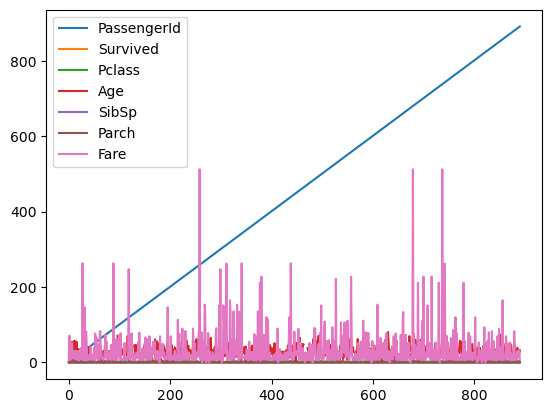

In [132]:
titanicData.plot()

Obviously, the data looks like a mess. Though we can see some values looking... higher than others. That's because we're plotting each passenger (based on their index) and plotting variables like their id (hence why we have the straight linear line: it's a clear 1:1 relationship), the fares spiking up based on passengers that are travelling in the most luxury, etc.

Let's remove some of the variables to clear things up.

<Axes: >

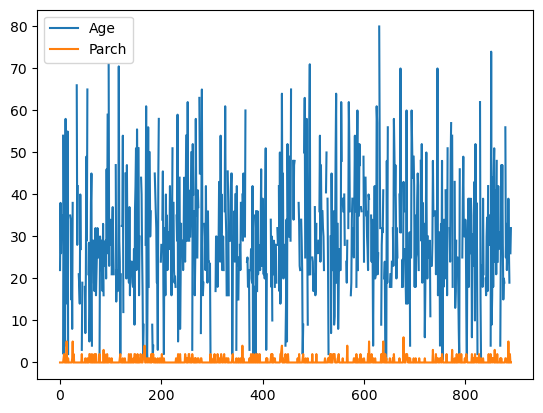

In [135]:
newTitanicData = titanicData[['Age', 'Parch']]
newTitanicData.plot()

That's better.

We're also not limited to just line graphs! We can create scatterplots (plots that show off the relationship between two variables based on their entries) with our data. This is especially useful is we would like to determine the relationship between two variables. Here's how we can create a Scatterplot with pandas.

<Axes: xlabel='Age', ylabel='Fare'>

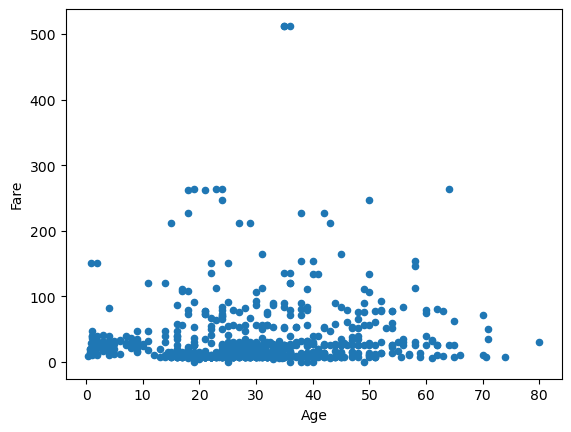

In [138]:
titanicData.plot(kind='scatter', x='Age', y='Fare')

And we can also create histograms!

<Axes: ylabel='Frequency'>

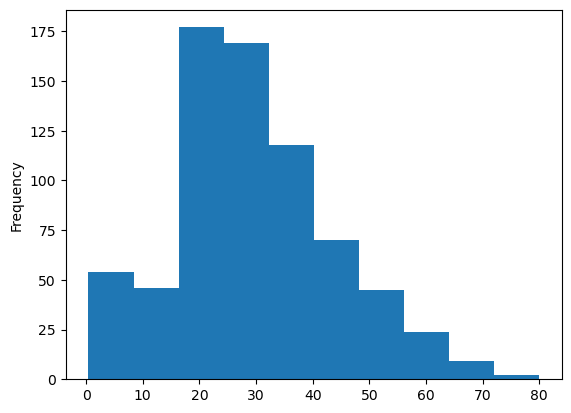

In [141]:
titanicData['Age'].plot(kind='hist')

This is a brief sampling of some of the plotting we can do in Python! Once again, we ideally want to use a library like `matplotlib` or `seaborn` to be able to plot the data. Feel free to take a look at online resources on the two libraries if you want to get ahead of yourself, but for the sake of time (and to avoid hurling a bunch of new information all at once to you), we will be going more in-depth about visualization and analysis in our EDA workshop.

Join us next week to learn more about the data extraction and cleaning process! We will begin collecting data from Musicboard, and I'm excited to see where we go. :)

# TODO: Assignment 2

To exercise your knowledge in NumPy/Pandas and tie in our concept in recommender systems, let's work with some movie ratings! Follow the link below to get a copy of the MovieLens 20M dataset to download for this assignment. The MovieLens dataset(s) is a very popular dataset to evaluate the effectiveness of novel recommender systems in published research, so it's cool to be able to be able to do work on this already!

Note: For this assignment, you should only download the ratings.csv since that's what we will want to work with. If you want to do the challenge problems, you should also download the movie.csv file as well. **DO NOT** upload the datasets to your Github page (as in, do not add them to your git commits), because Github has a file size limit (around 250 MB, if I remember correctly).

MovieLens 20M Dataset: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset?select=rating.csv

1. Load the ratings.csv file, and get some summary statistics from the dataframe.

In [ ]:
# Your code here

2. Check for any null values in your dataset(s), and if there are any null values, remove those rows.

In [ ]:
# Your code here

3. Let's work on some data preprocessing. In your ratings dataframe, take the timestamp column and create new columns for 'Year', 'Month', and 'Day'. The timestamp column should be formatted as `YYYY-MM-DD hh:mm:ss`. (Hint: you can either cast the column as a string and do some string slicing to get the values you want; or you can look up info on `datetime`, cast the column as datetime values, and get information from those values)

In [ ]:
# Your code here

4. Create a histogram of all of the ratings made during or after 2010. Consider what you might need to do with the dataset in order to get only ratings from 2010 onwards. You may either use the built-in Pandas functions, or import an outslide library like `matplotlib.pyplot` or `seaborn` if you'd like.

In [ ]:
# Your code here

5. For each movie, find the average rating, and display them in a dataframe. Which movie (movieid) has the highest average rating? (I didn't cover this in the lecture, but for this problem, I recommender looking up the `.groupby()` function and seeing examples).

In [ ]:
# Your code here

6. [CHALLENGE] Load the movie.csv file, and combine the two datasets together based on their corresponding movieids. From there, find the average rating for comedy, romance, and horror movies.

In [164]:
# Your code here

To get started, let's import ```numpy``` and ```pandas``` from last time, but also include a new library: ```matplotlib.pyplot```.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/Shareddrives/Kaggle Walkthrough - ADSC Fall 2023/Kaggle Walkthrough PUBLIC/Meetings/2023-10-18/Data"

Mounted at /content/drive
/content/drive/Shareddrives/Kaggle Walkthrough - ADSC Fall 2023/Kaggle Walkthrough PUBLIC/Meetings/2023-10-18/Data


Matplotlib is far and away the most popular data visualization tool in Python. It's used all across the Python spectrum, from academic purposes to the workforce, and many other data visualization libraries in Python build on top of the work of Matplotlib, including Seaborn!

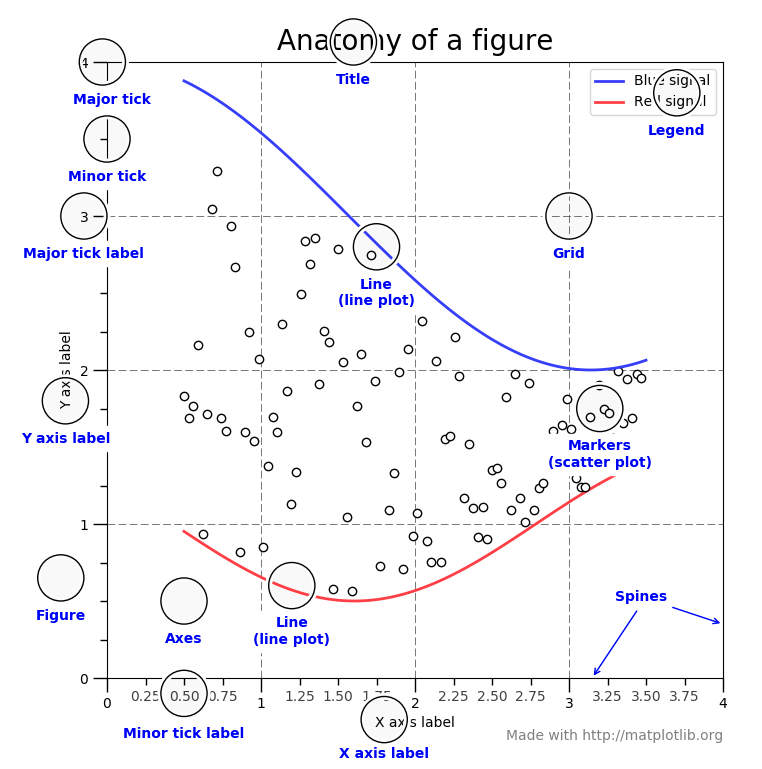

In [ ]:
IPython.display.Image('matplotlib.png')

## Part 1.1: Matplotlib Terminology + Line Graphs

If you have an array of data, this can be easily plotted by calling ```plt``` in the ```matplotlib``` library. The example below is a basic example of a line graph:

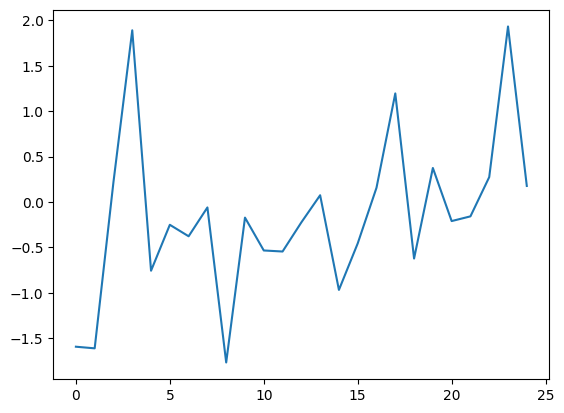

In [ ]:
randoData = np.random.normal(0, 1, [25])

plt.plot(randoData)

Notice that by default, if you call ```plot()```, it *can* take in just one parameter: the y value. Under this case, it makes the assumption that your x-values start at 0 and increment by one each time.

However, if we want to manually input our values, we can do so as well. Just remember that if we do this using two parameters, the first parameter is our **x** value, and the second parameter is our **y** value.

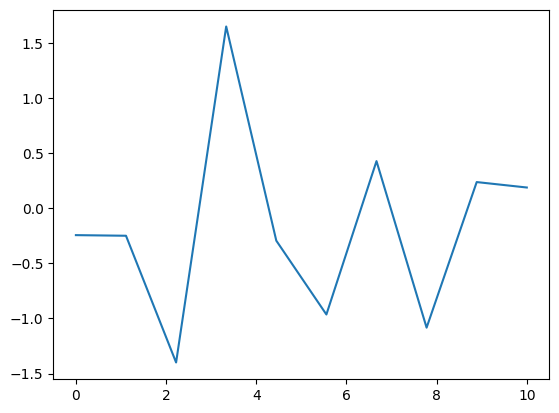

In [ ]:
x=np.linspace(0,10,10)
y=np.random.normal(0,1,[10])
plt.plot(x, y)

One more thing to note from above: if we do choose to have an ```x``` and ```y``` parameters, then the number of values (lengths) of ```x``` and ```y``` *must* be the same. If not, then our program will raise an exception (and why wouldn't it? If you had eleven x values, but only ten y values, then how do you know what x value is going to be left without a corresponding y value?)

To change the color of a line in a plot, just call ```color``` or ```c``` as a parameter.

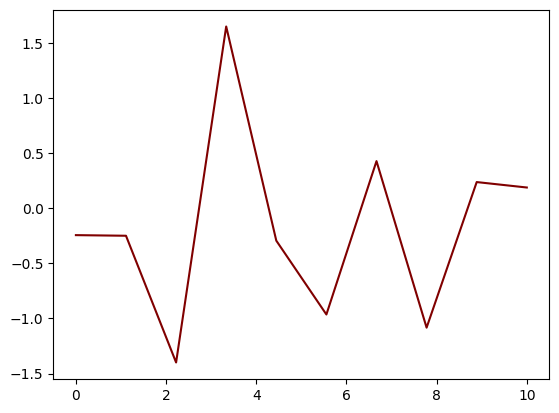

In [ ]:
plt.plot(x, y, color="maroon")
# The code below should yield the same result
# plt.plot(x, y, c="maroon")

We can call a scatter plot by calling ```.scatter()```. Just like ```.plot()```, it can take in both an ```x``` and ```y``` parameter, and just like the ```x``` and ```y``` parameters in ```.plot()```, both must be of the same length. We can also change the color of each scatterplot entry by using ```color``` as a parameter, and we can change the marker by calling ```marker``` as a parameter.

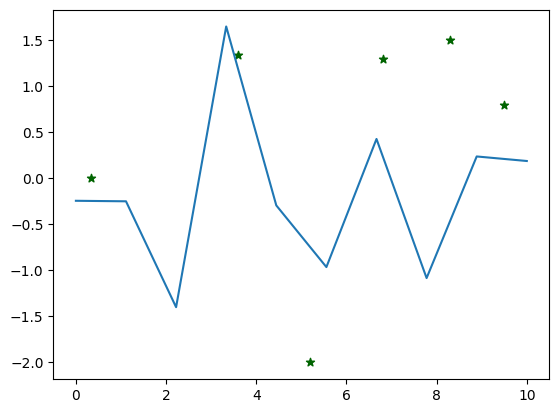

In [ ]:
plt.plot(x, y)
plt.scatter([8.3, 6.8, 5.2, 0.34, 9.5, 3.6], [1.5, 1.3, -2, 0, 0.8, 1.34], color='darkgreen', marker='*')

By default, matplotlib will establish an x-limit and a y-limit such that all entries in a graph will fit nicely. However, that might not be suitable at times (for example: a line graph where most values have a corresponding y-value in between -2 and 2, but we have a single value that's greater than 10,000). Alternatively, we might want to be able to zoom into a portion of a graph.

That's where ```.xlim()``` and ```.ylim()``` come in. Both take in two parameters: the first creates the lower bounds, and the second creates the upper bounds.

In the example below, if we wanted to zoom into the x-values between 0 and 5, and zoom into the y-values between -0.5 and 0.5, we can do it like so:

(-0.5, 0.5)

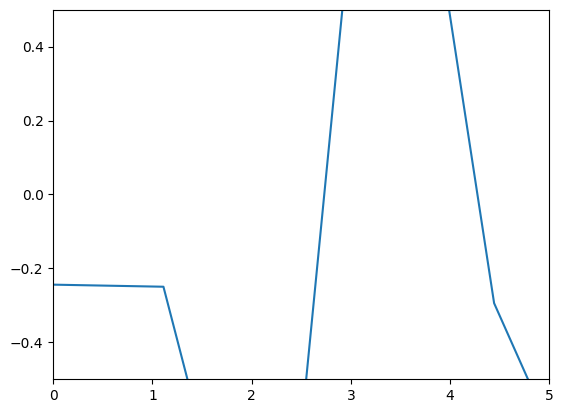

In [ ]:
plt.plot(x, y)
plt.xlim(0,5)
plt.ylim(-0.5,0.5)

The information we presented is really cool so far, but even if we were to plot some points and slap that onto a lab report, we'd still likely get points taken off for our graphs. It might not be because of faulty data or because we plotted our points incorrectly, but rather, we're missing our title and our axis labels!

To add a title and axis labels, we can call them with ```.title()```, ```.xlabel()```, and ```.ylabel()```. They all take in a single parameter: a string with the title/label name you want.

Text(0, 0.5, 'My y-axis')

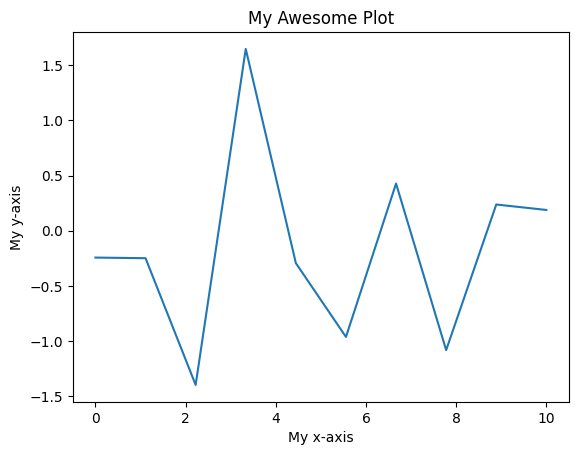

In [ ]:
plt.plot(x, y)
plt.title('My Awesome Plot')
plt.xlabel('My x-axis')
plt.ylabel('My y-axis')

Challenge time: what if we want to plot multiple lines on a single graph? The nice thing about matplotlib is that this is entirely possible! In fact, you don't have to do any extra steps! You can just call ```.plot()``` for all plots you want on a single graph, and show the results!

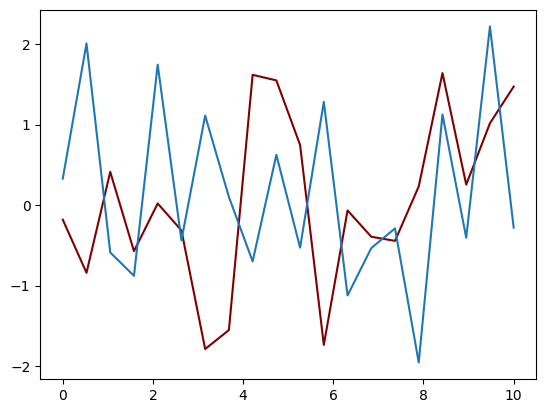

In [ ]:
x=np.linspace(0,10,20)
y1=np.random.normal(0,1,[20])
y2=np.random.normal(0,1,[20])
plt.plot(x, y1, c="maroon")
plt.plot(x, y2)

That's cool, but how do I know which line is which? You might already know the answer to this, but you likely won't be so confident once we introduce more lines. We can solve this by calling ```label``` as a parameter inside of ```.plot()```... right?

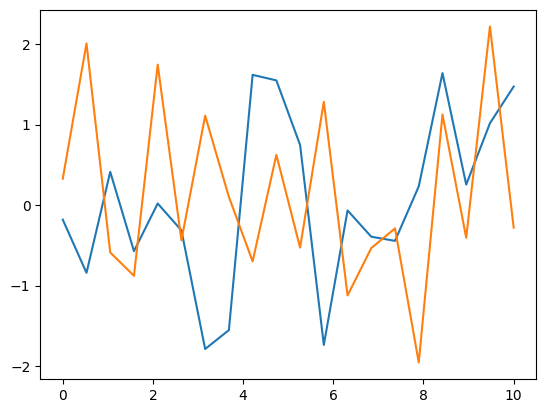

In [ ]:
plt.plot(x, y1, label='Uno')
plt.plot(x, y2, label='Dos')

...not quite. Sure, we assigned labels to each line, but to the average viewer, they won't be able to distinguish between which line is which. Instead, to show the labels, we need to call ```.legend()``` (with the parantheses because this is a function, but there are no parameters needed for it).

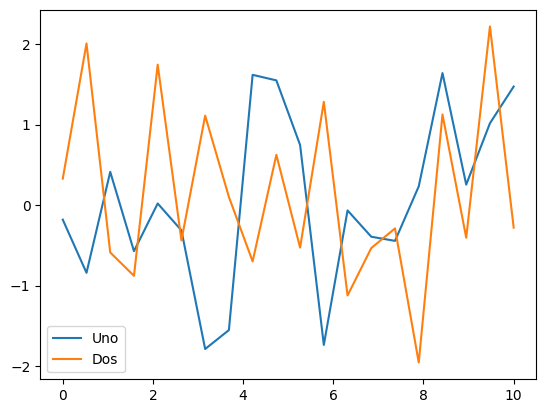

In [ ]:
plt.plot(x, y1, label='Uno')
plt.plot(x, y2, label='Dos')
plt.legend()

Now we know how to graph several line plots on a single graph. Now let's flip the script: what if I want to have multiple line plots on separate graphs?

Before we answer that, we can use subplots. An example of a singular subplot on a figure is shown below.

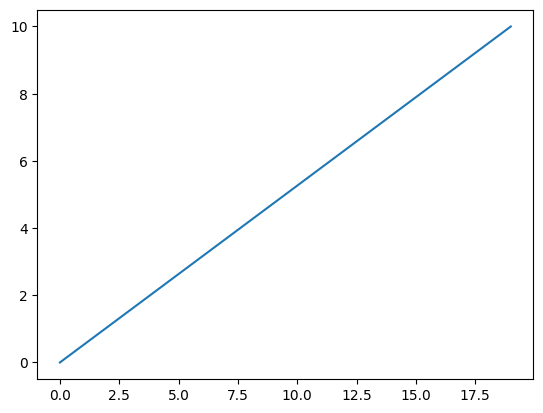

In [ ]:
fig = plt.figure()  # an empty figure with no axes
ax = fig.add_subplot() # give it an axes
ax.plot(x) # add the plot

If we want multiple subplots, we can adjust the number of subplots we want with the first two parameters. The ```.subplots()``` function creates a "matrix" of plots, with the first two parameters deciding how many rows and columns of plots we want, respectively.

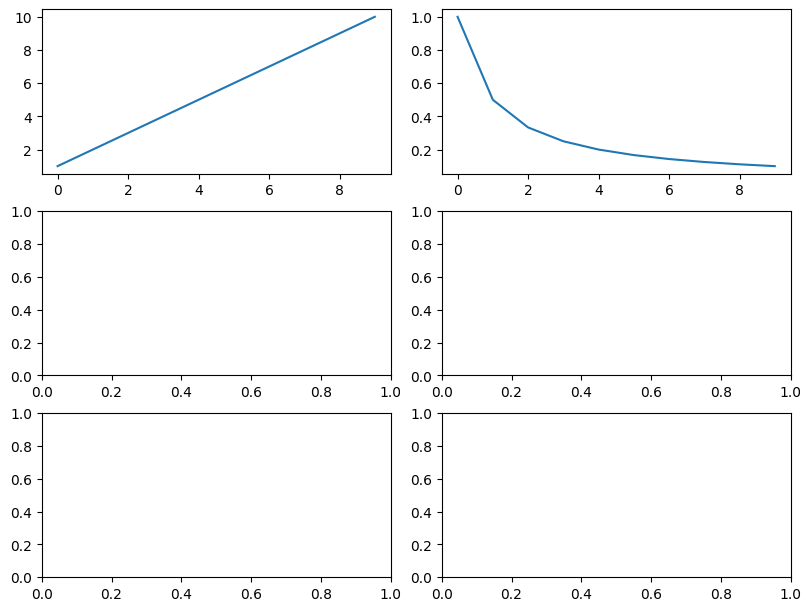

In [ ]:
fig, ax = plt.subplots(3, 2, constrained_layout = True, figsize = (8, 6)) # 4 empty subfigure with a 2x2 grid of Axes

## access the axes with slicing
x=np.linspace(1,10,10)
ax[0,0].plot(x)
ax[0,1].plot(1 / x)

Well, that's really cool, but we can also use it to be able to graph lines or actual equations, too! To do this, we can use ```linspace``` (remember this from the ```numpy``` library?) to create an array of values subdivided into smaller increments.

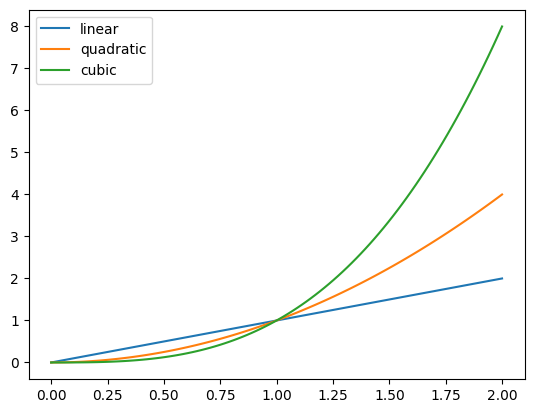

In [ ]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.legend()

## Part 1.2: Scatter Plot

Scatterplots are useful in visualizing relationships in datapoints by plotting each data point in a space. They are also excellent tools to identify different sources of information.

In [ ]:
house = pd.read_csv('bcs.csv')
house.head(5)

,Price,Sqft,Baths,Location
0,2400,4918,4.5,"Bryan, TX"
1,680,3645,3.0,"Bryan, TX"
2,570,1900,2.0,"Bryan, TX"
3,400,3123,3.5,"Bryan, TX"
4,320,2365,3.0,"Bryan, TX"


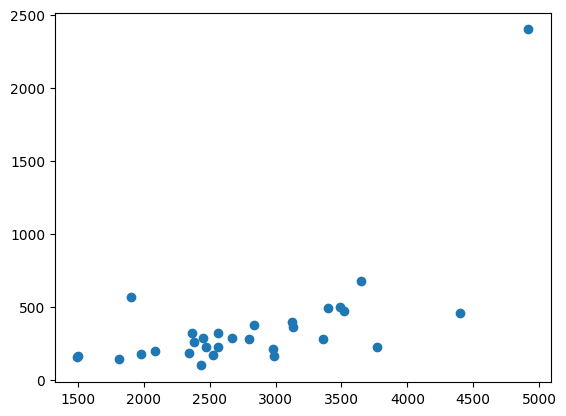

In [ ]:
plt.scatter(house['Sqft'], house['Price'])

In [ ]:
house = house[house['Price'] < 1000]
house.head(5)

,Price,Sqft,Baths,Location
1,680,3645,3.0,"Bryan, TX"
2,570,1900,2.0,"Bryan, TX"
3,400,3123,3.5,"Bryan, TX"
4,320,2365,3.0,"Bryan, TX"
5,280,3361,3.0,"Bryan, TX"


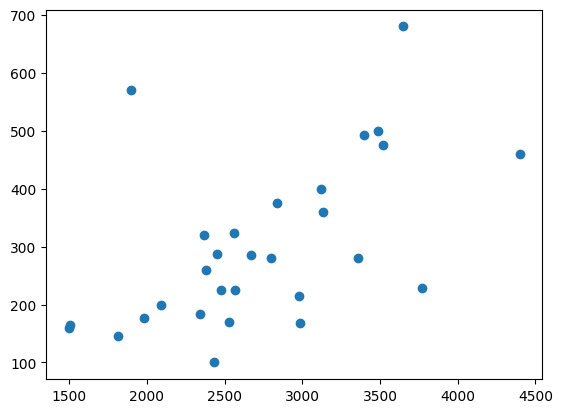

In [ ]:
plt.scatter(house['Sqft'], house['Price'])

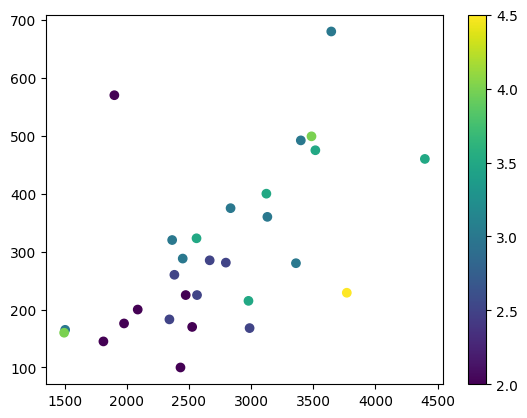

In [ ]:
plt.scatter(x=house['Sqft'], y=house['Price'], c=house['Baths'])
plt.colorbar()
plt.show()

In [ ]:
bryan = house[house['Location'] == "Bryan, TX"]
cstat = house[house['Location'] == "College Station, TX"]
cstat.head(5)

,Price,Sqft,Baths,Location
15,499,3486,4.0,"College Station, TX"
16,492,3400,3.0,"College Station, TX"
17,475,3517,3.5,"College Station, TX"
18,460,4398,3.5,"College Station, TX"
19,375,2835,3.0,"College Station, TX"


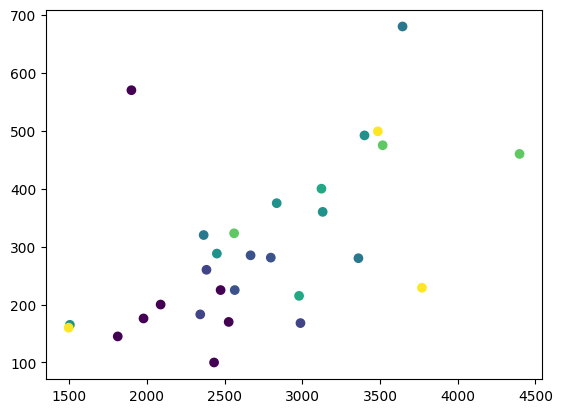

In [ ]:
plt.scatter(x=cstat['Sqft'], y=cstat['Price'], c=cstat['Baths'])
plt.scatter(x=bryan['Sqft'], y=bryan['Price'], c=bryan['Baths'])
plt.show()

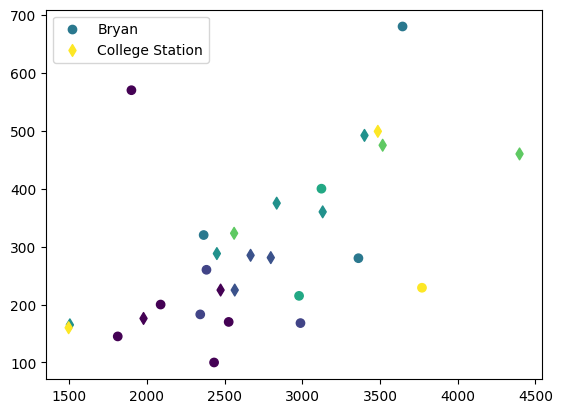

In [ ]:
plt.scatter(x=bryan['Sqft'], y=bryan['Price'], c=bryan['Baths'], marker='o')
plt.scatter(x=cstat['Sqft'], y=cstat['Price'], c=cstat['Baths'], marker='d')
plt.legend(['Bryan', 'College Station'])
plt.show()

## Part 1.3: Histograms

In [ ]:
boston = pd.read_csv('2019-boston-marathon-results.csv')
boston.head(5)

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN


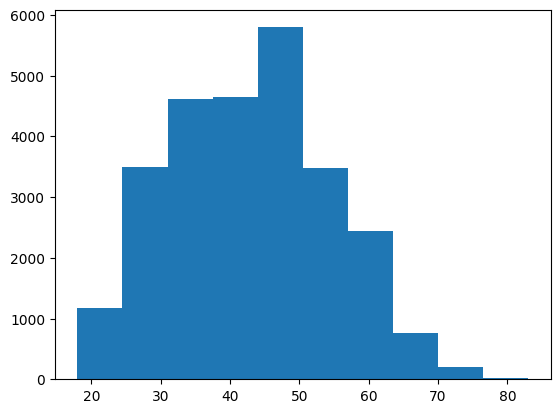

In [ ]:
plt.hist(boston['Age'])
plt.show()

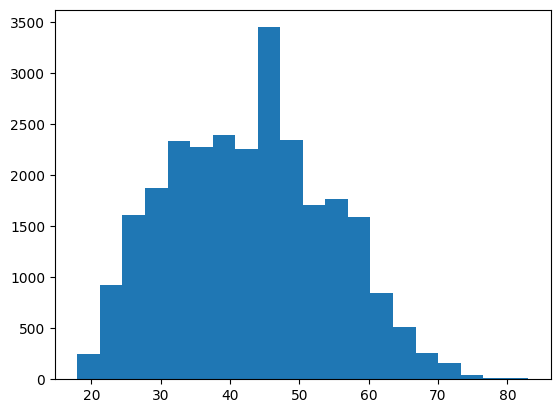

In [ ]:
plt.hist(boston['Age'], bins=20)
plt.show()

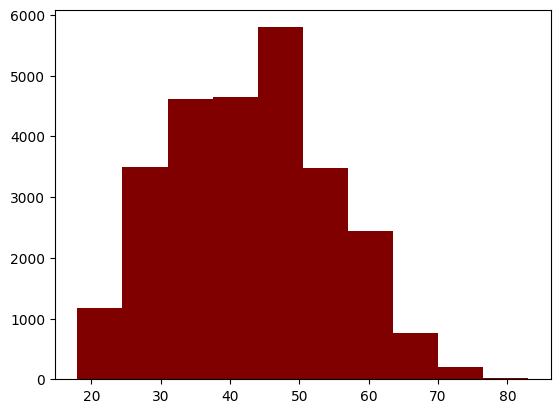

In [ ]:
plt.hist(boston['Age'], color='maroon')
plt.show()

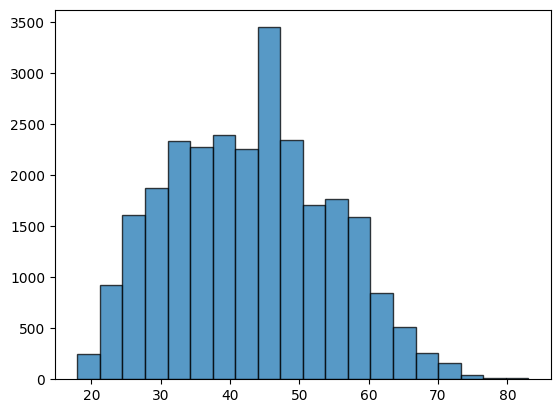

In [ ]:
plt.hist(boston['Age'], bins=20, alpha=0.75, ec='black')
plt.show()

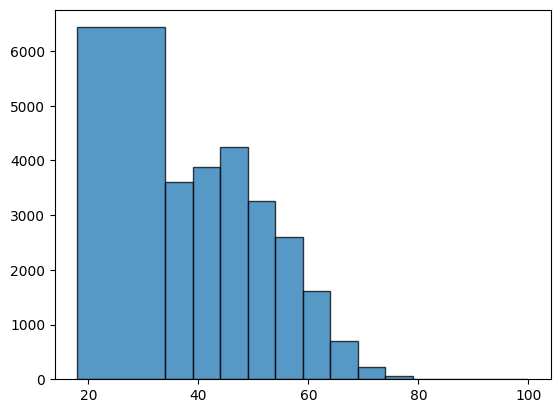

In [ ]:
plt.hist(boston['Age'], bins=[18,34,39,44,49,54,59,64,69,74,79,100], alpha=0.75, ec='black')
plt.show()

## Part 1.4: Other Cool Graphs

### Part 1.4.1: Bar Charts

Index(['United States', 'Kenya', 'Japan', 'Ethiopia', 'Eritrea', 'Morocco',
       'United Kingdom'],
      dtype='object')


<BarContainer object of 7 artists>

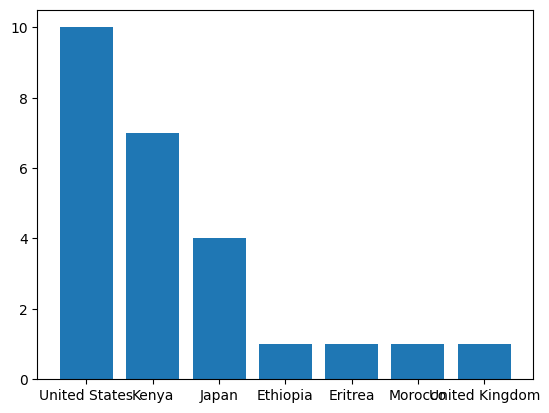

In [ ]:
top25count = boston['Country'].iloc[:25].value_counts()
print(top25count.index)
plt.bar(top25count.index, top25count)

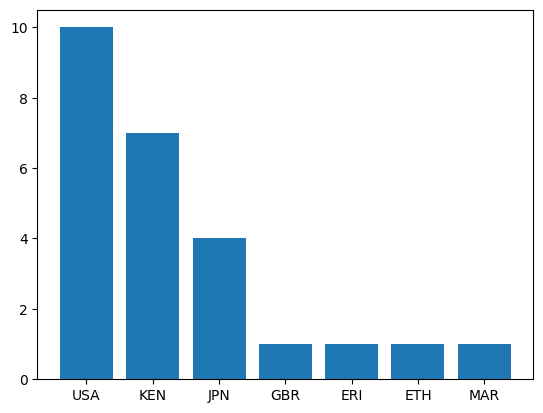

In [ ]:
plt.bar(top25count.index, top25count)
plt.xticks(top25count.index, ['USA', 'KEN', 'JPN', 'GBR', 'ERI', 'ETH', 'MAR'])
plt.show()

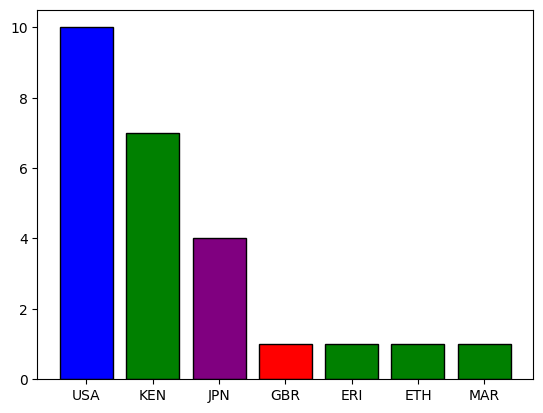

In [ ]:
color_list = ['blue', 'green', 'purple', 'red', 'green', 'green', 'green']
plt.bar(top25count.index, top25count, color=color_list, edgecolor='black')
plt.xticks(top25count.index, ['USA', 'KEN', 'JPN', 'GBR', 'ERI', 'ETH', 'MAR'])
plt.show()

### Part 1.4.2: Pie Charts

Let's say we want to find the percentage of men versus women who completed the Boston Marathon in 2019. How would we go about that? Well, a first attempt might look something like this:
```
plt.pie(boston['Gender'])
plt.show()
```

However, the code above will result in a compile error. The reason our code wasn't able to handle that was because we did not make the distinction that we wanted to count the different categories in our code. Sure, this does sound pretty silly, but think about it for a second: the computer can't process an individual 'M' value.

The way we can go about getting an array that counts the unique values is by using ```.value_counts()```.

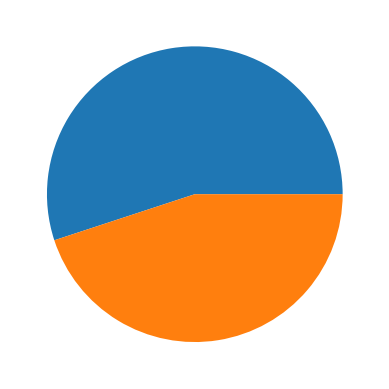

In [ ]:
plt.pie(boston['Gender'].value_counts())
#print(boston['Gender'].value_counts())
plt.show()

Ok, now we have a pie chart, but this tells us basically nothing. It looks more like a sand dune during the day than it does a pie chart, and we have little context for this: we don't know what this is about, there's no title, there's no legend, no percentages - point is, this fails at being a good pie chart.

What can we do to fix it? For starters, giving it some labels and a title would be nice. We can do this by adding ```labels``` as a parameter, and call ```.title()``` to assign a proper title.

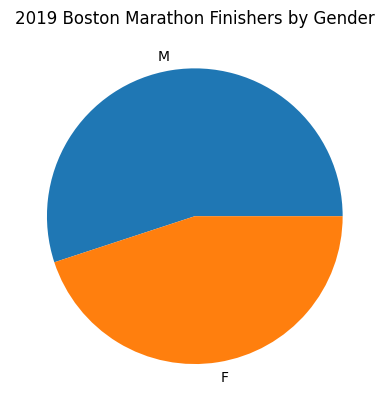

In [ ]:
gender = boston['Gender'].value_counts()
gender_labels = ['M', 'F']
plt.pie(gender, labels=gender_labels)
plt.title("2019 Boston Marathon Finishers by Gender")
plt.show()

This looks way better, but we can still do more. For instnace, while we now know more men have completed the 2019 Boston Marathon than women, we still don't know the overall percentage. We know it's greater than 50%, but what is it exactly? 60%? 55%?

We can fix this by calling ```autopct``` in the parameters of ```.pie()``` to assign a percentage to the graph. We can put in a formatted string (f-string) to accurately represent this.

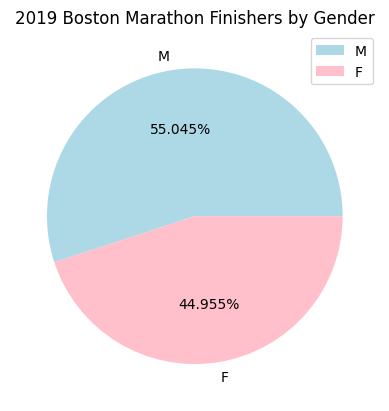

In [ ]:
plt.pie(gender, labels=gender_labels, colors=['lightblue', 'pink'], autopct='%1.3f%%')
plt.title("2019 Boston Marathon Finishers by Gender")
plt.legend()
plt.show()

Now we're talking! Two more basic features of ```.pie()``` that we can go over are the ```explode``` and ```startangle``` parameters.

```explode``` takes in a tuple and for the number of distinct items in the pie chart, we can set a value to offset that specific wedge. For example, in the chart below, we can take the wedge containing the percentage of men and separate that from the rest of the wedges (or wedge, singular, in this case).

```startangle``` adjusts the possible starting angle of the data by a certain number of degrees counter-clockwise. Assuming that our starting point is due east of the pie chart (similar to a unit circle from calculus), we can call this "0 degrees"; then, we can rotate in a counter-clockwise direction for our starting angle. By default, ```startangle``` starts at 0 degrees (an example of a 35/25/25/15 pie chart with angles is displayed below).

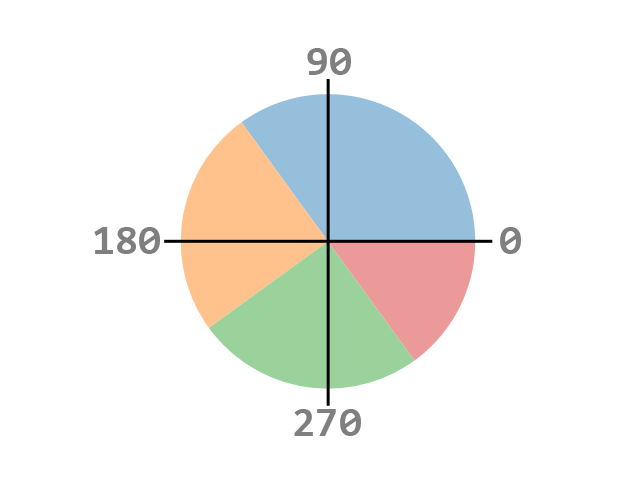

In [ ]:
IPython.display.Image("img_matplotlib_pie_angles.png")

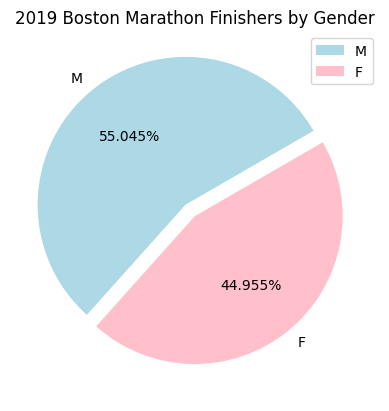

In [ ]:
plt.pie(gender, labels=gender_labels, colors=['lightblue', 'pink'], autopct='%1.3f%%', explode=(0.1, 0.0), startangle=30)
plt.title("2019 Boston Marathon Finishers by Gender")
plt.legend()
plt.show()

### Part 1.4.3: Heatmaps

The following lines of code below is to get you familiarized with heatmaps. We don't anticipate on using heatmaps often for this project, but this is still something really interesting that I think is worth pointing out. This example is pulled straight from the Matplotlib documentation, so if you're interested, go checkout their page on heatmaps.

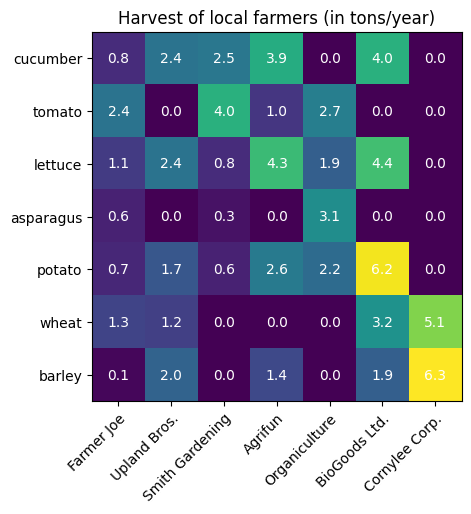

In [ ]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)))
ax.set_xticklabels(farmers)
ax.set_yticks(np.arange(len(vegetables)))
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
plt.show()

## Part 1.5: Exercises

Excercise: Create a plot that looks like the one below. Note the color of the line, axis limits, and title names.

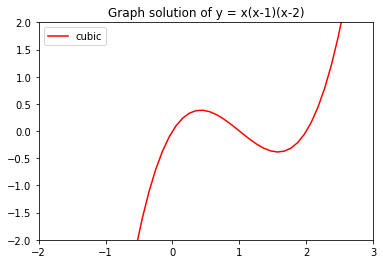

In [ ]:
IPython.display.Image('excercise1.png')

In [ ]:
x = np.linspace(-5, 5, 100)
y = x * (x - 1) * (x - 2)

Exercise: Using the 2019 Boston Marathon dataset, create a histogram of all of the American runners, separated by age group. Group them into the following eight bins: under 20 years, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, and over 80 years.

You are not given a visual example this time around. Try to visualize the graph in your head, including the title and x/y-labels. Once you have that implemented, did the graph you have in mind look similar to the actual results? Why or why not?

Seaborn is a great data visualization library in Python that provides a high-level interface for making beautiful plots in less or more intuitive code.

There are some general steps to making a basic plot in Seaborn:
* Step 1: Load in data
* Step 2: Choose figure aesthetics
* Step 3: Choose a plot type
* Step 4: Plot customization

These steps of course get more complicated as we make more complex plots, but let's start with the basics for now.

### **Step 0**: Import all necessary libraries

Before we can do anything with data, we need to import all the libraries we'll be using first (this is good practice!). We'll be using **pandas**, **matplotlib.pyplot**, and **seaborn**. Since this notebook will use data on a Google drive, we'll also use **drive** from the **google.colab** library. We'll give each library its industry standard alias as well.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/Shareddrives/Kaggle Walkthrough - ADSC Fall 2023/Kaggle Walkthrough PUBLIC/Meetings/2023-10-18/Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Kaggle Walkthrough - ADSC Fall 2023/Kaggle Walkthrough PUBLIC/Meetings/2023-10-18/Data


### **Step 1**: Load our Data

Let's use pandas (pd) to read in and manipulate our data

In [ ]:
grades = pd.read_csv('2009Grade.csv')
# Let's see what data we're working with!
print(grades.head())

   ID        Mid1    Mid2       Final         HW      Score Grade
0   1   91.666667   86.25   74.285714  33.425926  71.407077     C
1   2  100.000000   95.00   88.571429  88.491508  93.015734     A
2   3   88.888889  102.50  100.000000  84.387372  93.944065     A
3   4   83.333333   70.00   71.428571  59.994402  71.189077     C
4   5   91.666667   90.00   77.142857  25.766178  71.143926     C


### **Step 2**: Choose figure aesthetics

Seaborn has many styles to choose from. We'll explore more later, but let's use the default styling for now. This includes a grey grid called ```darkgrid```, 4 spines (borders of the figure), and the ```notebook``` style.

In [ ]:
sns.set() # Set the default seaborn style

### **Step 3**: Choose a plot type

Seaborn offers many visualization types of plots, but let's start with a simple boxplot to build up from the basics first.

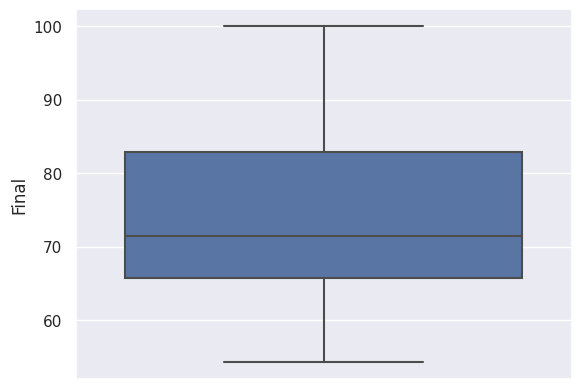

In [ ]:
# Boxplot
b1 = sns.boxplot(data = grades, y = "Final", flierprops = {"marker": "x"})

While a boxplot is useful on it's own, we may find it more useful to separate a particular variable by some grouping. This is especially true for stratified data.

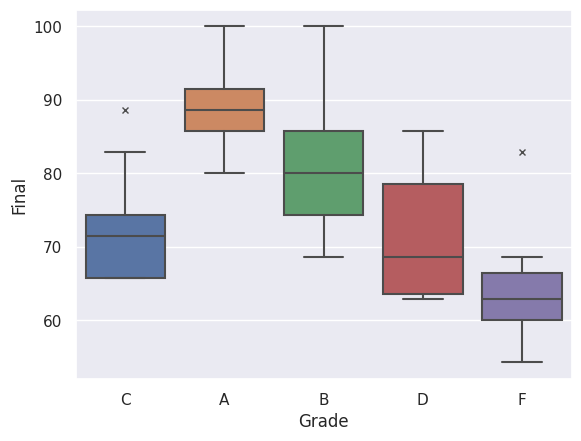

In [ ]:
# Separated by letter grade
b2 = sns.boxplot(data = grades, x = "Grade", y = "Final", flierprops = {"marker": "x"}) # No custom colors

### **Step 4**: Plot Customization

Seaborn also allows us to pick our own color palette as well if we don't like their default colors. Here I defined a list of colors in their HEX code form (from the internet) to use in plots.

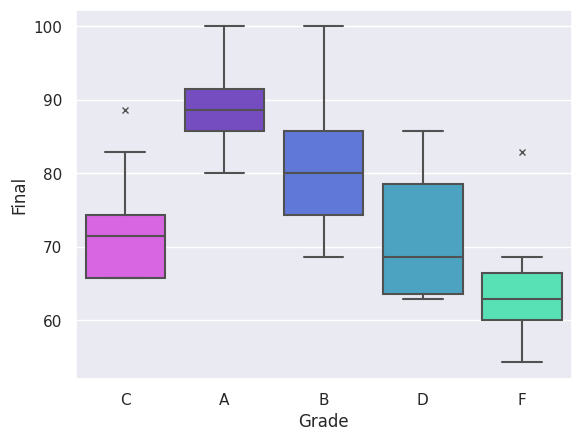

In [ ]:
my_colors = ["#E951F5", "#7139D4", "#4C6CEB", "#39ADD4",
             "#43F7BE", "#F57F47", "#D43431"]

# Custom Colors
b3 = sns.boxplot(data = grades, x = "Grade", y = "Final", flierprops = {"marker": "x"}, palette = my_colors)

Notice that I've been using matplotlib.pyplot as ```plt``` in my code so far. We can use ```plt``` on top of ```sns``` because seaborn was built based on matplotlib! Seasborn also integrates well with panda data structures, so it is worthwhile to consider the possibilities available to you with these 3 libraries alone. Let's customize our plot further with ```plt```:

Text(0, 0.5, 'Final Exam Grade')

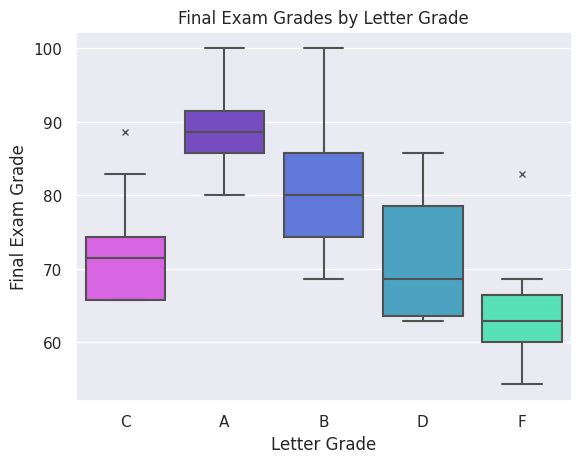

In [ ]:
# Label customiation using Matplotlib Pyplot
b4 = sns.boxplot(data = grades, x = "Grade", y = "Final", flierprops = {"marker": "x"}, palette = my_colors)
plt.title("Final Exam Grades by Letter Grade")
plt.xlabel("Letter Grade")
plt.ylabel("Final Exam Grade")
#plt.ylim(50, 100)

We can also save seaborn plots the same way we'd save matplotlib plots:

In [ ]:
# Saving our b4 plot
b4_fig = b4.get_figure() # Get the figure in a variable
b4_fig.savefig("grade_boxplot_transparent.png", transparent = True) # Save as a transparent plot
b4_fig.savefig("grade_boxplot.png") # Save as a white background plot

### **More Plot Types**

Seaborn offers a variety of plotting types that build on matplotlib:
* Scatterplot
* Line plot
* Bar plot
* Swarm plot
* Box plot
* Violin plot
* Histogram Plot
* Joint plot
* Pair plot
* More...

And to plot these, we're going to use datasets built-in to seaborn now as well!

In [ ]:
# List of all Seaborn Datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# New dataset from Seaborn
restaurant = sns.load_dataset('tips')
print(restaurant.info()) # View the structure of the data frame, built with pandas!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [ ]:
print(restaurant.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### **Histogram**

Text(0.5, 1.0, 'Total Bill')

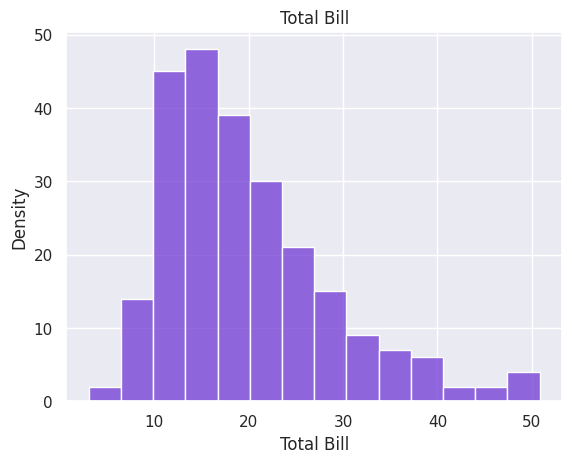

In [ ]:
plt.clf() # Clear previous figure
swrm = sns.histplot(data = restaurant, x = "total_bill", color = my_colors[1])
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Total Bill")

Text(0.5, 1.0, 'Total Bill Density')

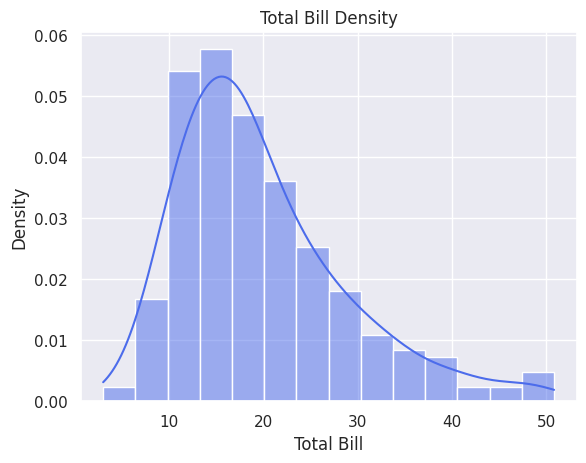

In [ ]:
plt.clf() # Clear previous figure
hist1 = sns.histplot(data = restaurant, x = "total_bill", color = my_colors[2],
                     stat = "density", # Total area of bars is now 1
                     kde = True) # Kernel Density Est.
plt.xlabel("Total Bill")
plt.title("Total Bill Density")

### **Swarm Plot**

Text(0.5, 1.0, 'Tips by Gender')

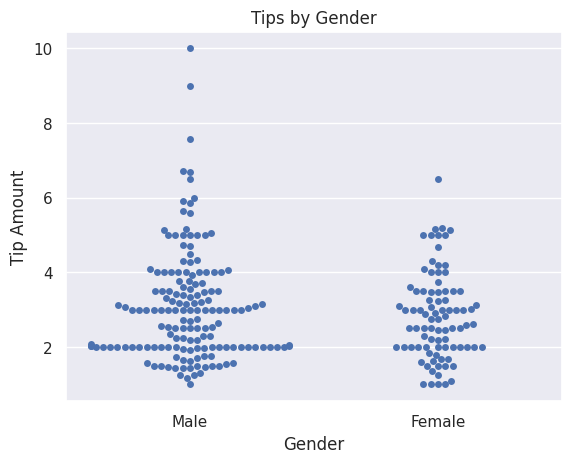

In [ ]:
plt.clf() # Clear previous figure
swrm = sns.swarmplot(data = restaurant, x = "sex", y = "tip")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.title("Tips by Gender")

### **Violin Plot**

Text(0.5, 1.0, 'Tips by Gender')

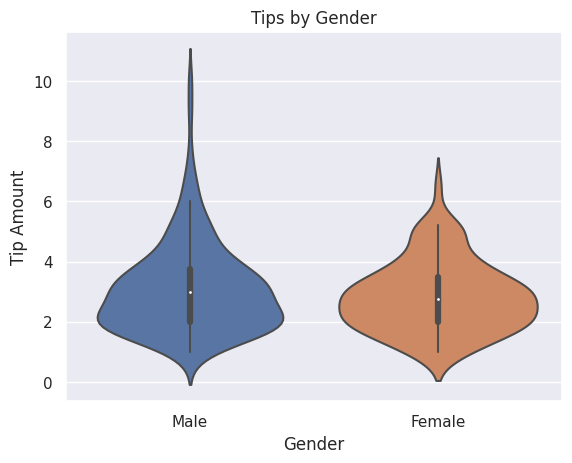

In [ ]:
plt.clf() # Clear previous figure
violin = sns.violinplot(data = restaurant, x = "sex", y = "tip")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.title("Tips by Gender")

### **Scatter Plot**

Text(0.5, 1.0, 'Total Bill vs. Tips')

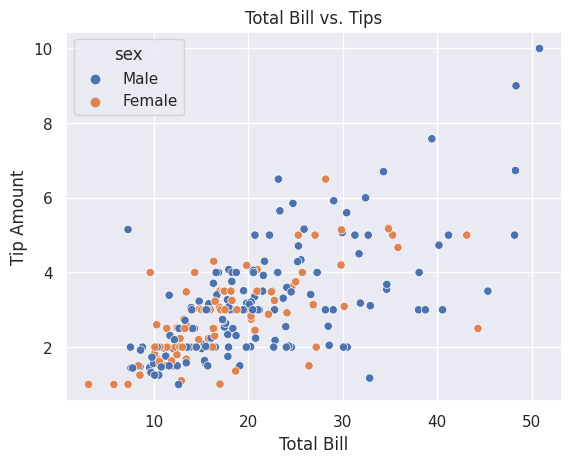

In [ ]:
plt.clf() # Clear previous figure
scttr = sns.scatterplot(data = restaurant, x = "total_bill", y = "tip", hue = "sex") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

### **Using Correlation**

In [ ]:
restaurant.corr()['total_bill']['tip'] # r, not r^2

<ipython-input-57-fd6142dcae04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  restaurant.corr()['total_bill']['tip'] # r, not r^2


0.6757341092113648

Text(0.5, 1.0, 'Total Bill vs. Tips')

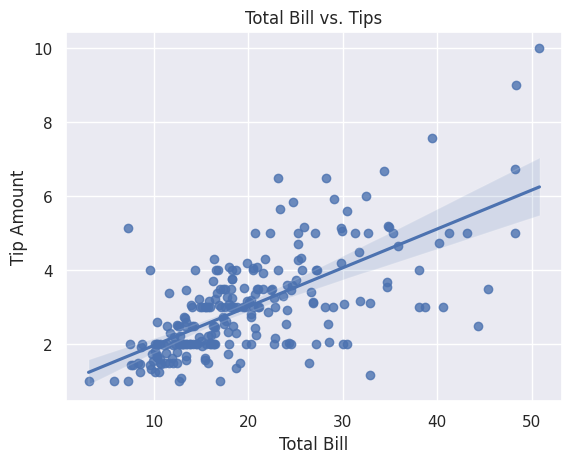

In [ ]:
plt.clf() # Clear previous figure
reg = sns.regplot(data = restaurant, x = "total_bill", y = "tip") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

Text(0.5, 1.0, 'Total Bill vs. Tips')

<Figure size 640x480 with 0 Axes>

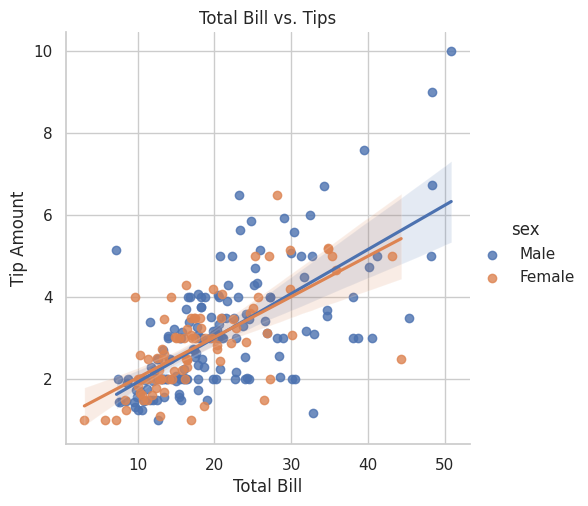

In [ ]:
plt.clf() # Clear previous figure
sns.set_style('whitegrid')
reg_scttr = sns.lmplot(data = restaurant, x = "total_bill", y = "tip", hue = "sex") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

### **Bar Chart**

Text(0.5, 1.0, 'Days Visited by Gender')

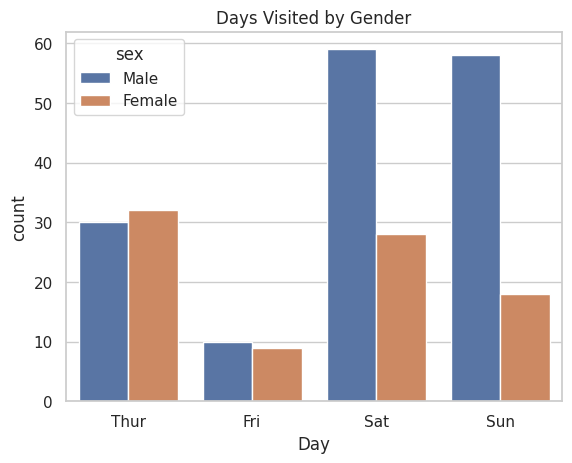

In [ ]:
plt.clf() # Clear previous figure
sns.set_style('whitegrid')
restaurant = sns.load_dataset('tips')
freq_bar = sns.countplot(data = restaurant, x = 'day', hue = 'sex') # Color points by gender
plt.xlabel("Day")
plt.title("Days Visited by Gender")

### **Pie Chart**

Text(0.5, 1.0, 'Days Visited')

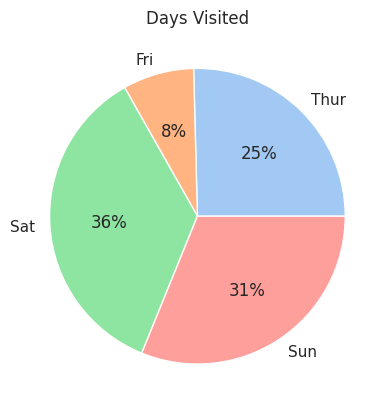

In [ ]:
plt.clf() # Clear previous figure
days = restaurant.groupby('day').day.count()
new_colors = sns.color_palette('pastel')
plt.pie(days, labels = days.index, autopct='%.0f%%', colors = new_colors) # pyplot used
plt.title("Days Visited")

### **Pair Plot**

Text(0.45, 1.02, 'Pair Plot of Tips, Total Bill, and Party Size')

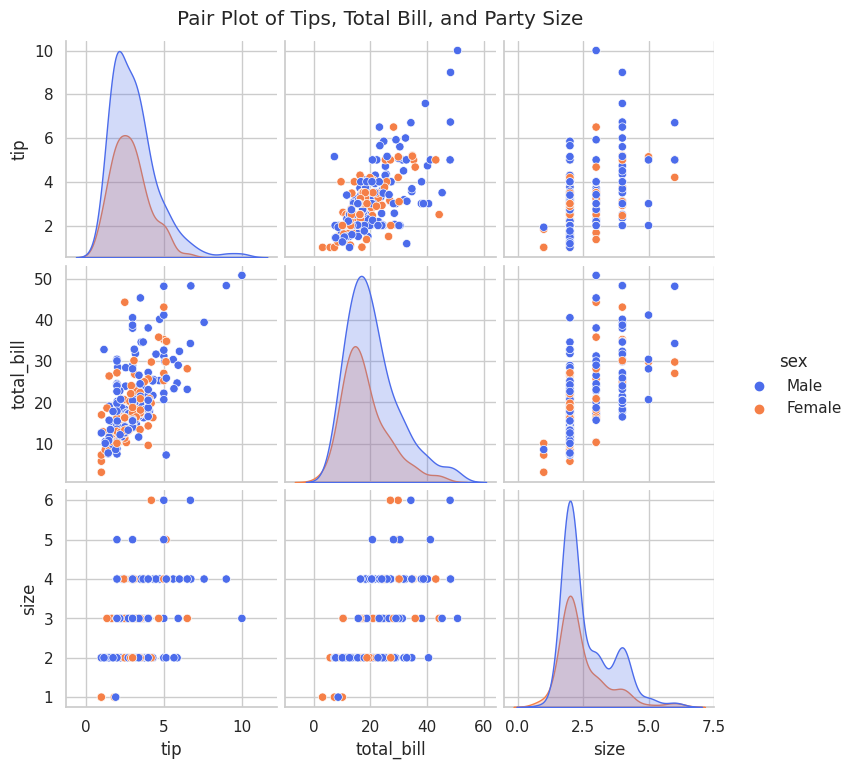

In [ ]:
prp = sns.pairplot(data = restaurant,
             vars = ["tip", "total_bill", "size"],  # Data columns used
             kind = "scatter",                      # Kind of plots for different column pairs
             diag_kind = "kde",                     # Diagonal plot kind
             hue = "sex",                           # Color data by gender
             palette = my_colors[2:6:3])
plt.suptitle("Pair Plot of Tips, Total Bill, and Party Size", x = 0.45, y = 1.02)

### **Line Plot**

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Text(0.5, 1.0, 'Flights Time Series Data')

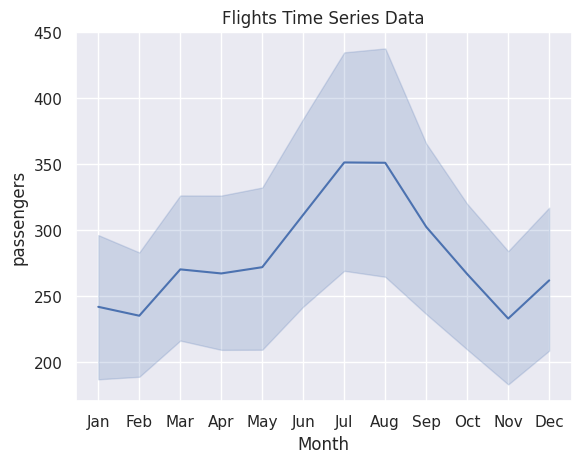

In [ ]:
plt.clf() # Clear previous figure
sns.set()
time = sns.lineplot(data = flights, x = 'month', y = 'passengers')
plt.xlabel("Month")
plt.title("Flights Time Series Data")

<Figure size 640x480 with 0 Axes>

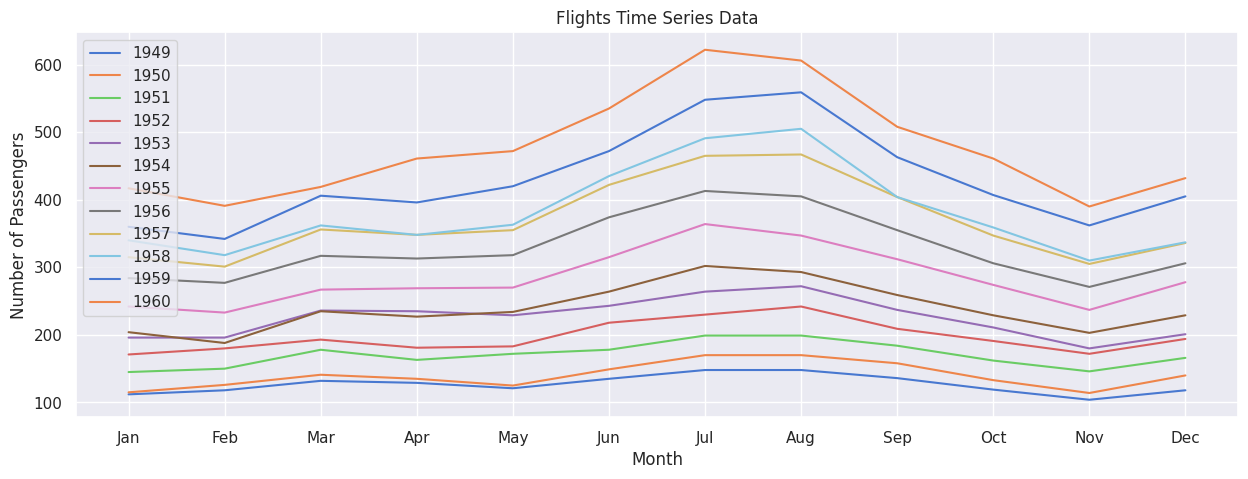

In [ ]:
plt.clf() # Clear previous figure
plt.figure(figsize=(15,5))
time = sns.lineplot(data = flights, x = 'month', y = 'passengers', hue = 'year', palette = 'muted')
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Flights Time Series Data")
plt.legend(loc='upper left')

### **Joint Plot**

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


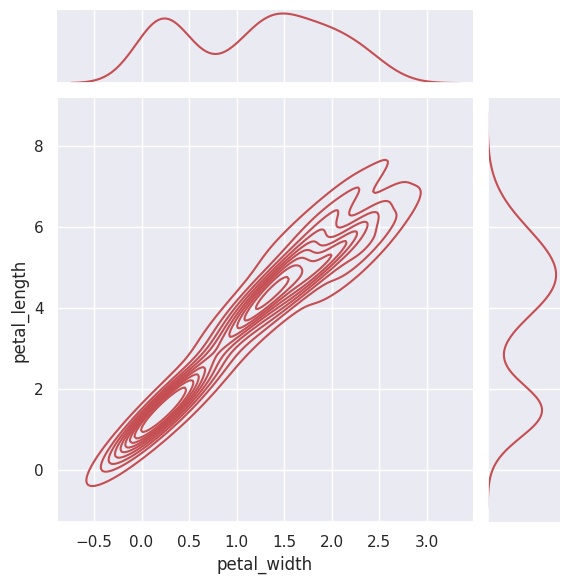

In [ ]:
jnt1 = sns.jointplot(data = iris, x = "petal_width", y = "petal_length", kind = 'kde', color='r') # Kernel Density Est.
#plt.xlabel("Petal Width")
#plt.ylabel("Petal Length")
#plt.title("Joint Plot of Petal Width and Length")

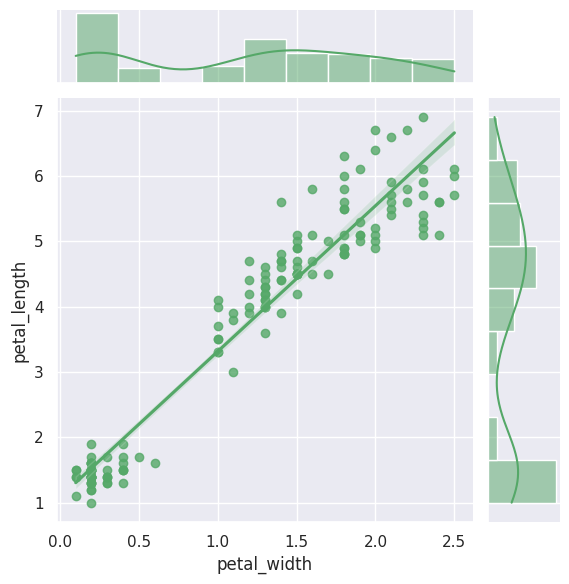

In [ ]:
jnt2 = sns.jointplot(data = iris, x = "petal_width", y = "petal_length", kind = 'reg', color = 'g') # Regression